In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
house_data = pd.read_csv('house_data_ultimate_cleaned', sep=',', index_col='Unnamed: 0')
df = house_data.copy()

In [4]:
df.head()

,Area,Price,State_of_building,Facades,Bedrooms,Kitchen,Furnished,Open_fire,Zip_code,Land_surface,Terrace,Terrace_surface,Swimming_pool,Subtype_property,Garden,Garden_surface,Regions,Price_per_square_meter
0,123.0,200000,Good,3.0,2.0,Installed,No,No,3294,429.0,No,0,No,house,Yes,350,Flanders,1626.02
1,255.0,698000,Just renovated,4.0,4.0,Installed,No,No,2070,1210.0,No,0,No,villa,No,0,Flanders,2737.25
2,234.0,499000,As new,NaN,5.0,NaN,No,No,8800,744.0,No,0,No,villa,No,0,Flanders,2132.48
3,219.0,717000,As new,NaN,4.0,NaN,No,No,8000,760.0,No,0,No,house,No,0,Flanders,3273.97
4,156.0,429000,Good,4.0,4.0,Installed,No,No,8800,419.0,No,0,No,villa,Yes,90,Flanders,2750.00


In [5]:
df.isnull().sum()

Area                         0
Price                        0
State_of_building         2138
Facades                   1684
Bedrooms                    64
Kitchen                   2412
Furnished                    0
Open_fire                    0
Zip_code                     0
Land_surface                 0
Terrace                      0
Terrace_surface              0
Swimming_pool                0
Subtype_property             0
Garden                       0
Garden_surface               0
Regions                      0
Price_per_square_meter       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8333 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    8333 non-null   float64
 1   Price                   8333 non-null   int64  
 2   State_of_building       6195 non-null   object 
 3   Facades                 6649 non-null   float64
 4   Bedrooms                8269 non-null   float64
 5   Kitchen                 5921 non-null   object 
 6   Furnished               8333 non-null   object 
 7   Open_fire               8333 non-null   object 
 8   Zip_code                8333 non-null   int64  
 9   Land_surface            8333 non-null   float64
 10  Terrace                 8333 non-null   object 
 11  Terrace_surface         8333 non-null   int64  
 12  Swimming_pool           8333 non-null   object 
 13  Subtype_property        8333 non-null   object 
 14  Garden                  8333 non-null   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Area'),
  Text(1, 0, 'Price'),
  Text(2, 0, 'Facades'),
  Text(3, 0, 'Bedrooms'),
  Text(4, 0, 'Zip_code'),
  Text(5, 0, 'Land_surface'),
  Text(6, 0, 'Terrace_surface'),
  Text(7, 0, 'Garden_surface'),
  Text(8, 0, 'Price_per_square_meter')])

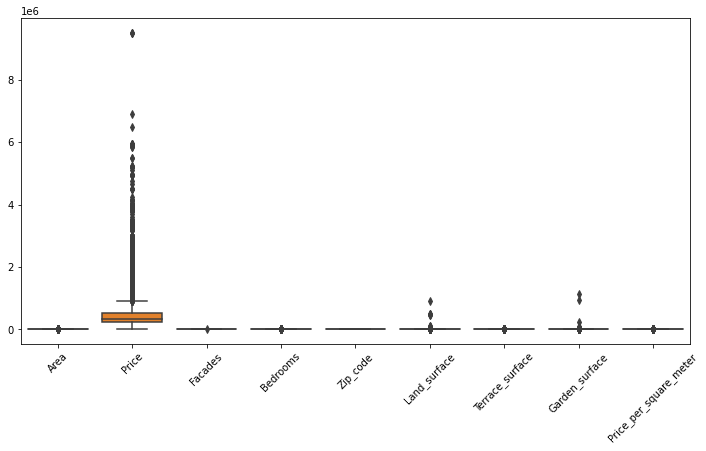

In [7]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

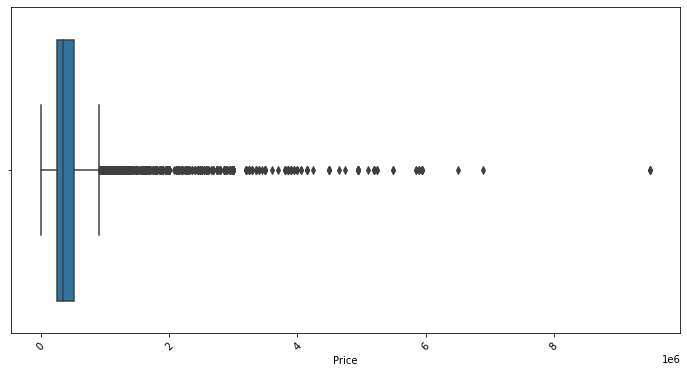

In [8]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price only
sns.boxplot(x=df['Price'])
plt.xticks(rotation=45)

In [9]:
df.Price.describe()

count    8.333000e+03
mean     5.167265e+05
std      6.241331e+05
min      2.500000e+03
25%      2.499900e+05
50%      3.400000e+05
75%      5.150000e+05
max      9.500000e+06
Name: Price, dtype: float64

In [13]:
outliers_of_price = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price.append(observation)
    return outliers_of_price

outlier_of_price = detect_outlier(df.Price)
print(outlier_of_price)

[5100000, 2450000, 2950000, 2750000, 2999000, 4950000, 4500000, 2550000, 3200000, 2800000, 2600000, 2890000, 5250000, 2750000, 2495000, 2500000, 2550000, 2985000, 3200000, 2950000, 5900000, 2890000, 3850000, 4950000, 3450000, 2550000, 2650000, 2999999, 2400000, 2690000, 2850000, 2450000, 2450000, 3600000, 2999000, 3950000, 2450000, 9500000, 2750000, 2600000, 2550000, 3850000, 2450000, 2495000, 3500000, 4150000, 2950000, 3000000, 5200000, 5200000, 3350000, 3200000, 3995000, 2600000, 3850000, 2999000, 3250000, 2990000, 2999999, 3800000, 5850000, 3250000, 3000000, 2900000, 4650000, 4950000, 2495000, 2750000, 2495000, 2490000, 2985000, 2690000, 2750000, 2600000, 2750000, 2575000, 2500000, 2999000, 2685000, 2600000, 3350000, 2875000, 2990000, 2450000, 3700000, 2750000, 3495000, 9500000, 3800000, 2990000, 3350000, 4950000, 2750000, 5950000, 4050000, 4950000, 3900000, 3850000, 2990000, 2490000, 2690000, 4250000, 2950000, 2950000, 3800000, 2800000, 3000000, 4750000, 3350000, 4950000, 3200000, 

In [22]:
number_of_outlier_of_price = len(outlier_of_price)
print(number_of_outlier_of_price)

243


In [12]:
print(np.where(df['Price'] > 3000000))

(array([  35,  203,  234,  300,  463,  869,  932,  986, 1133, 1137, 1539,
       1716, 1736, 1910, 2132, 2149, 2354, 2376, 2377, 2449, 2469, 2610,
       2624, 2775, 2801, 2938, 3004, 3023, 3987, 4075, 4095, 4101, 4180,
       4264, 4309, 4361, 4414, 4431, 4440, 4503, 4677, 4712, 4750, 4751,
       4804, 4808, 4809, 4862, 4903, 4984, 5177, 5215, 5239, 5315, 5328,
       5338, 5401, 5416, 5599, 5663, 5677, 5839, 5867, 5890, 6061, 6296,
       6317, 6380, 6395, 6421, 6722, 6785, 6789, 6818, 7006, 7024, 7048,
       7052, 7290, 7314, 7449, 7473, 7524, 7596, 7603, 7668, 7709, 7787,
       7820, 7845, 7851, 7977, 8076, 8122, 8197, 8198], dtype=int64),)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8333 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    8333 non-null   float64
 1   Price                   8333 non-null   int64  
 2   State_of_building       6195 non-null   object 
 3   Facades                 6649 non-null   float64
 4   Bedrooms                8269 non-null   float64
 5   Kitchen                 5921 non-null   object 
 6   Furnished               8333 non-null   object 
 7   Open_fire               8333 non-null   object 
 8   Zip_code                8333 non-null   int64  
 9   Land_surface            8333 non-null   float64
 10  Terrace                 8333 non-null   object 
 11  Terrace_surface         8333 non-null   int64  
 12  Swimming_pool           8333 non-null   object 
 13  Subtype_property        8333 non-null   object 
 14  Garden                  8333 non-null   

In [16]:
delete_row = [  35,  203,  234,  300,  463,  869,  932,  986, 1133, 1137, 1539,
       1716, 1736, 1910, 2132, 2149, 2354, 2376, 2377, 2449, 2469, 2610,
       2624, 2775, 2801, 2938, 3004, 3023, 3987, 4075, 4095, 4101, 4180,
       4264, 4309, 4361, 4414, 4431, 4440, 4503, 4677, 4712, 4750, 4751,
       4804, 4808, 4809, 4862, 4903, 4984, 5177, 5215, 5239, 5315, 5328,
       5338, 5401, 5416, 5599, 5663, 5677, 5839, 5867, 5890, 6061, 6296,
       6317, 6380, 6395, 6421, 6722, 6785, 6789, 6818, 7006, 7024, 7048,
       7052, 7290, 7314, 7449, 7473, 7524, 7596, 7603, 7668, 7709, 7787,
       7820, 7845, 7851, 7977, 8076, 8122, 8197, 8198]

df = df.drop(df.index[delete_row])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8237 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    8237 non-null   float64
 1   Price                   8237 non-null   int64  
 2   State_of_building       6102 non-null   object 
 3   Facades                 6556 non-null   float64
 4   Bedrooms                8177 non-null   float64
 5   Kitchen                 5849 non-null   object 
 6   Furnished               8237 non-null   object 
 7   Open_fire               8237 non-null   object 
 8   Zip_code                8237 non-null   int64  
 9   Land_surface            8237 non-null   float64
 10  Terrace                 8237 non-null   object 
 11  Terrace_surface         8237 non-null   int64  
 12  Swimming_pool           8237 non-null   object 
 13  Subtype_property        8237 non-null   object 
 14  Garden                  8237 non-null   

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

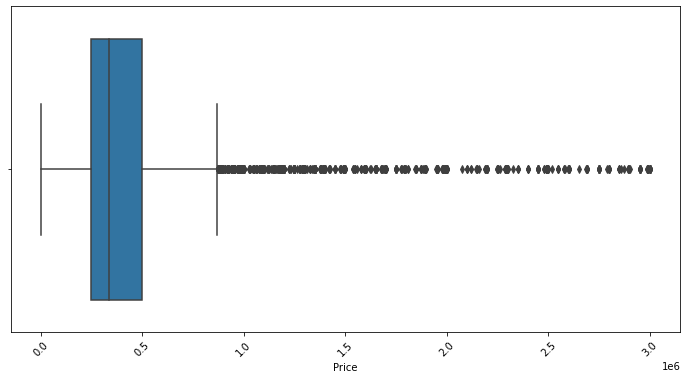

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price only
sns.boxplot(x=df['Price'])
plt.xticks(rotation=45)

In [19]:
outliers_of_price = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price.append(observation)
    return outliers_of_price

outlier_of_price = detect_outlier(df.Price)
print(outlier_of_price)

[1850000, 1950000, 2450000, 2950000, 1875000, 2750000, 2999000, 2550000, 2000000, 1895000, 2800000, 2600000, 2890000, 2200000, 1895000, 2750000, 2295000, 2350000, 2495000, 2295000, 2500000, 2550000, 2250000, 2190000, 2985000, 2950000, 2295000, 1850000, 2890000, 2350000, 1890000, 1850000, 2190000, 2290000, 2550000, 1999000, 1850000, 2650000, 2999999, 2400000, 2690000, 2285000, 2150000, 2850000, 2450000, 2450000, 1950000, 2075000, 1999000, 2100000, 2999000, 2250000, 2450000, 2750000, 2600000, 2550000, 2260000, 1980000, 2450000, 2495000, 1955000, 2295000, 2150000, 1900000, 2950000, 1995000, 3000000, 2145000, 2200000, 2600000, 2249000, 2200000, 2999000, 2195000, 1950000, 1850000, 2990000, 2999999, 1990000, 1975000, 2120000, 2325000, 1950000, 1895000, 1790000, 1950000, 3000000, 2900000, 1950000, 2495000, 1945000, 2750000, 2300000, 2495000, 2490000, 2985000, 2690000, 2750000, 2600000, 1845000, 1950000, 2750000, 2150000, 2575000, 1999000, 2500000, 2999000, 1850000, 1875000, 1950000, 1875000, 

In [20]:
z = np.abs(stats.zscore(df.Price))
print(z)

[0.61773643 0.51800723 0.06416589 ... 0.90281265 0.6970127  0.24889528]


In [21]:
threshold = 3
print(np.where(z > 3))

(array([  29,   37,   54,   92,  171,  198,  200,  264,  275,  322,  332,
        342,  347,  367,  454,  482,  483,  499,  598,  636,  672,  746,
        773,  824,  855,  888,  930,  957,  968,  981,  988, 1026, 1054,
       1094, 1143, 1195, 1269, 1306, 1340, 1344, 1351, 1406, 1412, 1438,
       1461, 1483, 1518, 1607, 1631, 1650, 1671, 1690, 1718, 1737, 1777,
       1778, 1945, 1949, 1960, 1968, 2028, 2185, 2194, 2195, 2221, 2246,
       2290, 2355, 2386, 2535, 2565, 2591, 2598, 2651, 2664, 2681, 2698,
       2705, 2710, 2792, 2836, 2849, 2858, 2873, 2900, 2911, 2945, 2974,
       2986, 3127, 3174, 3265, 3266, 3294, 3299, 3311, 3335, 3345, 3383,
       3427, 3451, 3468, 3487, 3523, 3591, 3593, 3602, 3636, 3646, 3665,
       3679, 3690, 3691, 3748, 3794, 3806, 3811, 3814, 3856, 3894, 3968,
       3993, 3998, 4055, 4111, 4193, 4195, 4196, 4297, 4325, 4343, 4372,
       4402, 4480, 4495, 4555, 4581, 4628, 4637, 4665, 4695, 4704, 4725,
       4782, 4799, 4839, 4854, 4898, 4906, 5000, 5

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

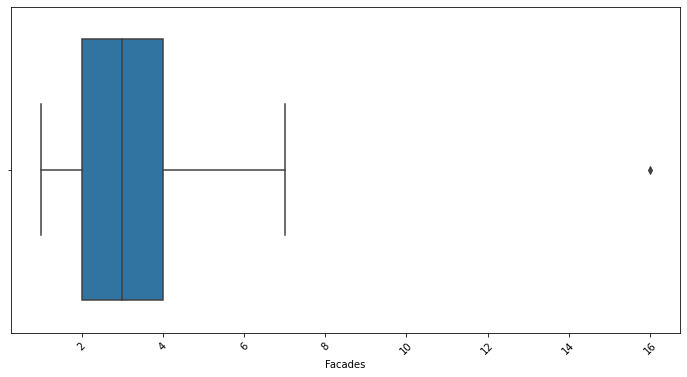

In [25]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for facades only
sns.boxplot(x=df['Facades'])
plt.xticks(rotation=45)

In [26]:
df['Facades'].describe()

count    6556.000000
mean        2.964308
std         0.853015
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Facades, dtype: float64

In [27]:
# finding the 1st quartile
# q1 = np.quantile(df['Facades'], 0.25)
q1 = df['Facades'].quantile(0.25)
 
# finding the 3rd quartile
# q3 = np.quantile(df['Facades'], 0.75)
q3 = df['Facades'].quantile(0.75)
med = np.median(df['Facades'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

2.0 7.0 -1.0


In [28]:
outliers_of_facades = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_facades.append(observation)
    return outliers_of_facades

outlier_of_facades = detect_outlier(df.Facades)
print(outlier_of_facades)

[16.0, 6.0, 6.0, 7.0, 6.0]


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

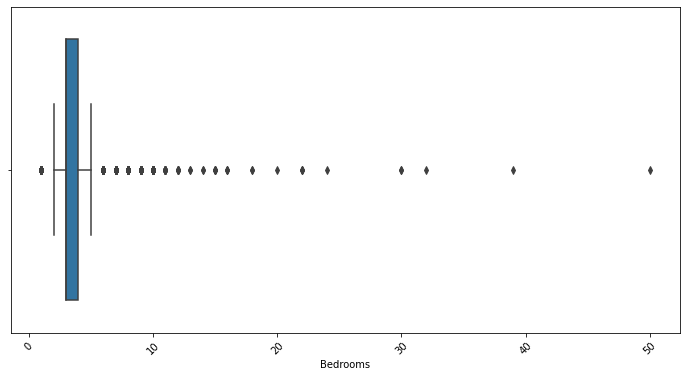

In [29]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for bedrooms only
sns.boxplot(x=df['Bedrooms'])
plt.xticks(rotation=45)

In [30]:
df['Bedrooms'].describe()

count    8177.000000
mean        3.680812
std         1.725504
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        50.000000
Name: Bedrooms, dtype: float64

In [31]:
outliers_of_bedrooms = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_bedrooms.append(observation)
    return outliers_of_bedrooms

outlier_of_bedrooms = detect_outlier(df.Bedrooms)
print(outlier_of_bedrooms)

[9.0, 10.0, 10.0, 10.0, 10.0, 9.0, 12.0, 10.0, 10.0, 10.0, 9.0, 18.0, 10.0, 14.0, 10.0, 10.0, 16.0, 12.0, 30.0, 13.0, 10.0, 10.0, 10.0, 16.0, 11.0, 20.0, 50.0, 10.0, 10.0, 9.0, 11.0, 11.0, 11.0, 10.0, 9.0, 9.0, 10.0, 10.0, 14.0, 30.0, 11.0, 15.0, 9.0, 9.0, 10.0, 9.0, 15.0, 9.0, 10.0, 11.0, 9.0, 10.0, 13.0, 11.0, 12.0, 9.0, 11.0, 10.0, 15.0, 10.0, 10.0, 9.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 24.0, 9.0, 22.0, 10.0, 22.0, 16.0, 9.0, 9.0, 12.0, 9.0, 22.0, 11.0, 15.0, 9.0, 12.0, 9.0, 10.0, 10.0, 9.0, 9.0, 10.0, 10.0, 10.0, 11.0, 9.0, 9.0, 11.0, 9.0, 10.0, 12.0, 11.0, 18.0, 9.0, 10.0, 9.0, 12.0, 9.0, 39.0, 10.0, 10.0, 11.0, 10.0, 15.0, 32.0, 9.0, 10.0]


In [32]:
number_of_outlier_of_bedrooms = len(outlier_of_bedrooms)
print(number_of_outlier_of_bedrooms)

114


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

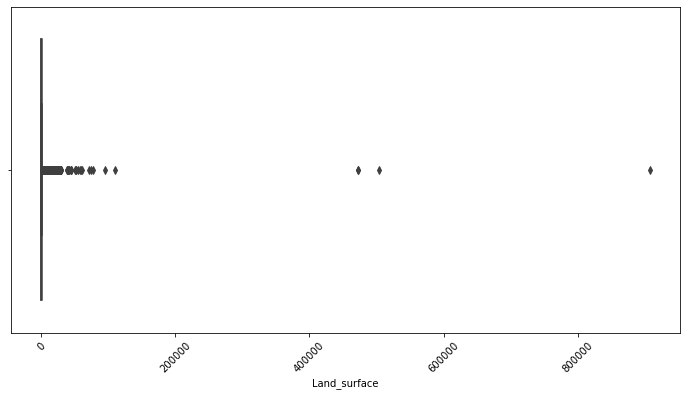

In [33]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Land_surface only
sns.boxplot(x=df['Land_surface'])
plt.xticks(rotation=45)

In [34]:
df['Land_surface'].describe()

count      8237.000000
mean       1404.120189
std       14091.218878
min           1.000000
25%         192.000000
50%         372.000000
75%         837.000000
max      907540.000000
Name: Land_surface, dtype: float64

In [35]:
outliers_of_land_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_land_surface.append(observation)
    return outliers_of_land_surface

outlier_of_land_surface = detect_outlier(df.Land_surface)
print(outlier_of_land_surface)

[60197.0, 45000.0, 52037.0, 503500.0, 71907.0, 60000.0, 110000.0, 57494.0, 907540.0, 77237.0, 44827.0, 472724.0, 44918.0, 95000.0, 49800.0, 52037.0, 75000.0, 45000.0, 472724.0, 54752.0]


In [36]:
outlier_of_land_surface_count = len(outlier_of_land_surface)
print(outlier_of_land_surface_count)

20


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

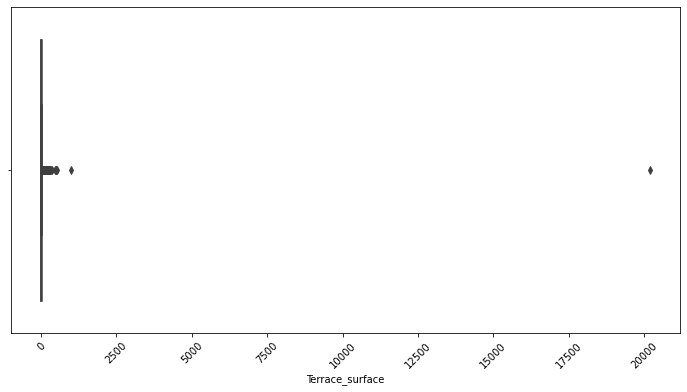

In [38]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Terrace_surface only
sns.boxplot(x=df['Terrace_surface'])
plt.xticks(rotation=45)

In [37]:
df['Terrace_surface'].describe()

count     8237.000000
mean        13.833677
std        224.105793
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max      20194.000000
Name: Terrace_surface, dtype: float64

In [38]:
outliers_of_terrace_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_terrace_surface.append(observation)
    return outliers_of_terrace_surface

outlier_of_terrace_surface = detect_outlier(df.Terrace_surface)
print(outlier_of_terrace_surface)

[1000, 20194]


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

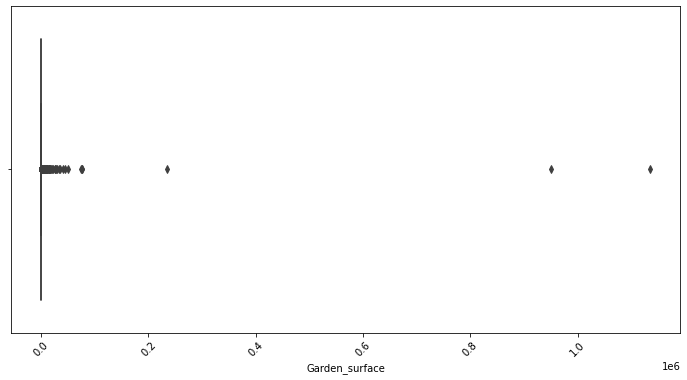

In [39]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for Garden_surface only
sns.boxplot(x=df['Garden_surface'])
plt.xticks(rotation=45)

In [40]:
df['Garden_surface'].describe()

count    8.237000e+03
mean     5.776759e+02
std      1.663154e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.600000e+01
max      1.134500e+06
Name: Garden_surface, dtype: float64

In [41]:
outliers_of_garden_surface = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_garden_surface.append(observation)
    return outliers_of_garden_surface

outlier_of_garden_surface = detect_outlier(df.Garden_surface)
print(outlier_of_garden_surface)

[1134500, 75000, 76020, 235000, 950002, 76020]


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

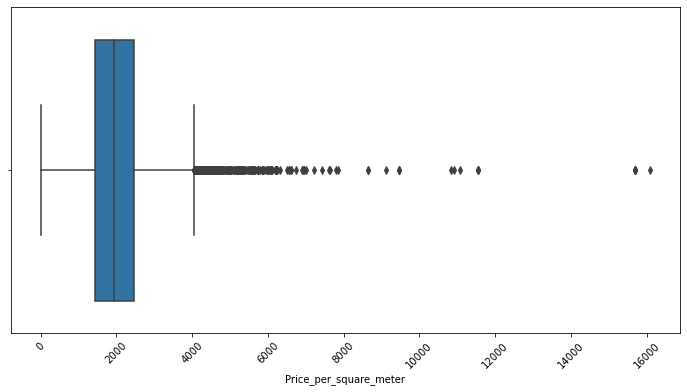

In [42]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot for price per square meter only
sns.boxplot(x=df['Price_per_square_meter'])
plt.xticks(rotation=45)

In [43]:
df['Price_per_square_meter'].describe()

count     8237.000000
mean      2077.652914
std       1071.836721
min         15.050000
25%       1428.570000
50%       1950.310000
75%       2478.570000
max      16086.960000
Name: Price_per_square_meter, dtype: float64

In [44]:
outliers_of_price_per_square_meter = []
def detect_outlier(data):
    
    threshold=3
    mean_of_data = np.mean(data)
    std_of_data =np.std(data)
    
    
    for observation in data:
        z_score= (observation - mean_of_data)/std_of_data 
        if np.abs(z_score) > threshold:
            outliers_of_price_per_square_meter.append(observation)
    return outliers_of_price_per_square_meter

outlier_of_price_per_square_meter = detect_outlier(df.Price_per_square_meter)
print(outlier_of_price_per_square_meter)

[6208.33, 5571.43, 5357.14, 6111.11, 15701.57, 5882.35, 5714.29, 6500.0, 6215.05, 5319.44, 7442.53, 5625.0, 5625.0, 5598.77, 5325.93, 6219.51, 6218.75, 6611.11, 16086.96, 6215.05, 7019.23, 5882.35, 5320.86, 6625.0, 5380.0, 5594.06, 5632.18, 9457.45, 6916.67, 6562.5, 15701.57, 6046.51, 5916.67, 5544.44, 7603.69, 11538.46, 9457.45, 6025.28, 6075.0, 6208.33, 5655.53, 9460.57, 5613.81, 5594.06, 11538.46, 6184.21, 6250.0, 5423.91, 5417.83, 6123.6, 11078.65, 5750.0, 6218.75, 7222.22, 5375.0, 6250.0, 8640.94, 15701.57, 5357.14, 6611.11, 6944.44, 5571.43, 5645.16, 5980.0, 5493.27, 6250.0, 5595.24, 5516.61, 10833.33, 5516.61, 5333.33, 5300.0, 11538.46, 5789.47, 11538.46, 5472.44, 5344.83, 5733.94, 5753.14, 5655.53, 5555.56, 10903.36, 6311.69, 9113.48, 5733.33, 8640.94, 6904.76, 7631.58, 5375.0, 5423.91, 6551.09, 5380.0, 5997.5, 5300.0, 6743.24, 5857.74, 5833.33, 7794.12, 15701.57, 6600.0, 5980.0, 6075.0, 6944.44, 5870.59, 5544.44, 5997.5, 7854.98, 5866.67, 5990.78, 15701.57]


In [45]:
number_of_outlier_of_price_per_square_meter = len(outlier_of_price_per_square_meter)
print(number_of_outlier_of_price_per_square_meter)

110


In [78]:
df_data.to_csv('house_data_price_outlier_remove.csv')